In [2]:
pip install lpips


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os, torch
from PIL import Image
import torchvision.transforms as T
import lpips

B_dir = r"datasets/coraline_AB/valB"   
Pred_dir = r"results/coraline_pix2pix/test_latest/images/fake_B"  

device = 'cuda' if torch.cuda.is_available() else 'cpu'
loss_fn = lpips.LPIPS(net='alex').to(device).eval()
tfm = T.Compose([
    T.Resize((512,512)),
    T.ToTensor(),
    T.Normalize([.5,.5,.5],[.5,.5,.5])
])

def load(path):
    im = Image.open(path).convert('RGB')
    return tfm(im).unsqueeze(0).to(device)

scores = []
for fname in os.listdir(B_dir):
    if not fname.lower().endswith(('.png','.jpg','.jpeg')):
        continue
    gt = load(os.path.join(B_dir, fname))
    pred = load(os.path.join(Pred_dir, fname))
    with torch.no_grad():
        s = loss_fn(pred, gt).item()
    scores.append(s)

print("LPIPS mean:", sum(scores)/len(scores), "N=", len(scores))


In [3]:
import os, torch
import torchvision.transforms as T
from PIL import Image
import lpips
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import numpy as np

results_dir = r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_v3_512\test_latest\images"

device = 'cuda' if torch.cuda.is_available() else 'cpu'

lpips_fn = lpips.LPIPS(net='alex').to(device).eval()

tf = T.Compose([
    T.Resize((512,512)),
    T.ToTensor(),
    T.Normalize([.5,.5,.5],[.5,.5,.5])
])

def load(path, norm=True):
    img = Image.open(path).convert('RGB')
    if norm:
        return tf(img).unsqueeze(0).to(device)
    else:
        return np.array(img.resize((512,512)))

lpips_scores, psnr_scores, ssim_scores = [], [], []

for fname in os.listdir(results_dir):
    if fname.endswith("_real_B.png"):
        base = fname.replace("_real_B.png", "")
        fake_path = os.path.join(results_dir, base + "_fake_B.png")
        real_path = os.path.join(results_dir, fname)

        if not os.path.exists(fake_path):
            continue

        gt = load(real_path)
        pred = load(fake_path)
        with torch.no_grad():
            d = lpips_fn(gt, pred).item()
        lpips_scores.append(d)

        gt_np = load(real_path, norm=False)
        pred_np = load(fake_path, norm=False)
        psnr_scores.append(psnr(gt_np, pred_np, data_range=255))
        ssim_scores.append(ssim(gt_np, pred_np, channel_axis=2))

print(f"LPIPS mean: {np.mean(lpips_scores):.4f}")
print(f"PSNR mean: {np.mean(psnr_scores):.2f} dB")
print(f"SSIM mean: {np.mean(ssim_scores):.4f}")


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\yalda/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|███████████████████████████████████████████████████████████████████████████████| 233M/233M [00:44<00:00, 5.52MB/s]


Loading model from: C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\lpips\weights\v0.1\alex.pth


C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\lpips\lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, ma

LPIPS mean: 0.0114
PSNR mean: 41.56 dB
SSIM mean: 0.9824


In [2]:
!pip install scikit-image


   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.8 MB 1.5 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/12.8 MB 1.7 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/12.8 MB 1.7 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/12.8 MB 1.7 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/12.8 MB 1.7 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/12.8 MB 1.7 MB/s eta 0:00:07
   ---- ----------------------------------- 1.6/12.8 MB 814.1 kB/s eta 0:00:14
   ----- ---------------------------------- 1.8/12.8 MB 792.4 kB/s eta 0:00:14
   -------- ------------------------------- 2.6/12.8 MB 1.1 MB/s eta 0:00:10
   ----------- ---------------------------- 3.7/12.8 MB 1.4 MB/s eta 0:00:07
   -------------

In [4]:
import os, cv2, numpy as np
from PIL import Image, ImageOps, ImageFilter, ImageEnhance

A_DIR = r"C:\Users\yalda\OneDrive\Desktop\Tpose Coraline Stylle\electrocute normal_resized"
B_DIR = A_DIR.replace("trainA", "trainB")
os.makedirs(B_DIR, exist_ok=True)

VALA_DIR = A_DIR.replace(r"\trainA", r"\valA")
VALB_DIR = VALA_DIR.replace("valA", "valB")
if os.path.isdir(VALA_DIR):
    os.makedirs(VALB_DIR, exist_ok=True)

BILATERAL_PASSES = 1
BILATERAL_D      = 7
BILATERAL_SIGC   = 60
BILATERAL_SIGS   = 60

POSTERIZE_BITS   = 4   

GAMMA            = 0.9  

CONTRAST_GAIN    = 1.25
SAT_GAIN         = 1.15
BRIGHT_GAIN      = 1.03

UNSHARP_RADIUS   = 1.6
UNSHARP_AMOUNT   = 190   
UNSHARP_THRESH   = 2

JITTER_PIX       = 1     

USE_TEXTURE      = True
TEX_PATH         = None  
TEX_OPACITY      = 0.02   
TEX_SCALE        = 1.0

PREVIEW_N        = 0

def cv_to_pil(img_bgr):
    return Image.fromarray(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

def pil_to_cv(img_pil):
    return cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

def edge_preserve_smooth(img_bgr):
    out = img_bgr.copy()
    for _ in range(BILATERAL_PASSES):
        out = cv2.bilateralFilter(out, BILATERAL_D, BILATERAL_SIGC, BILATERAL_SIGS)
    return out

def apply_gamma(img_bgr, gamma=0.95):
    if abs(gamma - 1.0) < 1e-3:
        return img_bgr
    inv = 1.0 / max(gamma, 1e-6)
    lut = np.array([(i/255.0)**inv * 255 for i in range(256)]).clip(0,255).astype(np.uint8)
    return cv2.LUT(img_bgr, lut)

def tiny_jitter(img_bgr, max_shift=1):
    if max_shift <= 0:
        return img_bgr
    tx = np.random.randint(-max_shift, max_shift+1)
    ty = np.random.randint(-max_shift, max_shift+1)
    if tx == 0 and ty == 0:
        return img_bgr
    M = np.float32([[1,0,tx],[0,1,ty]])
    return cv2.warpAffine(img_bgr, M, (img_bgr.shape[1], img_bgr.shape[0]), borderMode=cv2.BORDER_REPLICATE)

def add_micro_texture(img_bgr):
    if not USE_TEXTURE:
        return img_bgr
    h, w = img_bgr.shape[:2]

    if TEX_PATH and os.path.exists(TEX_PATH):
        tex = cv2.imread(TEX_PATH, cv2.IMREAD_GRAYSCALE)
        if tex is None:
            return img_bgr
        th = int(h * TEX_SCALE); tw = int(w * TEX_SCALE)
        tex = cv2.resize(tex, (tw, th), interpolation=cv2.INTER_LINEAR)
        rep_y = int(np.ceil(h / th)); rep_x = int(np.ceil(w / tw))
        tex = np.tile(tex, (rep_y, rep_x))[:h,:w]
    else:
        y, x = np.mgrid[0:h,0:w]
        tex = (7*np.random.randn(h,w) + 6*np.sin(x/19.0) + 6*np.cos(y/27.0)).astype(np.float32)
        tex = cv2.GaussianBlur(tex, (0,0), 0.9)
        tex = np.clip(((tex - tex.min())/(tex.max()-tex.min()))*255.0, 0, 255).astype(np.uint8)

    tex = tex.astype(np.float32)/255.0 - 0.5
    base = img_bgr.astype(np.float32)/255.0
    out = np.clip(base + TEX_OPACITY*tex[...,None], 0, 1)
    return (out*255).astype(np.uint8)

def stylize(img_bgr):
    sm = edge_preserve_smooth(img_bgr)

    sm = apply_gamma(sm, GAMMA)

    pil = cv_to_pil(sm)
    pil = ImageEnhance.Brightness(pil).enhance(BRIGHT_GAIN)
    pil = ImageEnhance.Contrast(pil).enhance(CONTRAST_GAIN)
    pil = ImageEnhance.Color(pil).enhance(SAT_GAIN)
    pil = ImageOps.posterize(pil, bits=POSTERIZE_BITS)

    pil = pil.filter(ImageFilter.UnsharpMask(radius=UNSHARP_RADIUS, percent=UNSHARP_AMOUNT, threshold=UNSHARP_THRESH))

    out = pil_to_cv(pil)

    out = tiny_jitter(out, JITTER_PIX)

    out = add_micro_texture(out)

    return out

def process_dir(src, dst, preview_n=0):
    os.makedirs(dst, exist_ok=True)
    names = [n for n in os.listdir(src) if n.lower().endswith((".png",".jpg",".jpeg"))]
    names.sort()
    if preview_n > 0:
        names = names[:preview_n]
        print(f"[PREVIEW] {len(names)} images from {src}")
    else:
        print(f"Processing {len(names)} images from {src}")

    count = 0
    for fn in names:
        p = os.path.join(src, fn)
        img = cv2.imread(p, cv2.IMREAD_COLOR)
        if img is None: 
            continue
        out = stylize(img)
        cv2.imwrite(os.path.join(dst, fn), out)
        count += 1
        if count % 200 == 0:
            print(f"  -> {count} done")
    print(f"Done: {count} -> {dst}")

process_dir(A_DIR, B_DIR, preview_n=0)   
if os.path.isdir(VALA_DIR):
    process_dir(VALA_DIR, VALB_DIR, preview_n=0)


Processing 150 images from C:\Users\yalda\OneDrive\Desktop\Tpose Coraline Stylle\electrocute normal_resized
Done: 150 -> C:\Users\yalda\OneDrive\Desktop\Tpose Coraline Stylle\electrocute normal_resized
Processing 150 images from C:\Users\yalda\OneDrive\Desktop\Tpose Coraline Stylle\electrocute normal_resized
Done: 127 -> C:\Users\yalda\OneDrive\Desktop\Tpose Coraline Stylle\electrocute normal_resized


In [5]:
import os, torch
import torchvision.transforms as T
from PIL import Image
import lpips
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import numpy as np

results_dir = r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_512_e50_v2\test_45\images"

device = 'cuda' if torch.cuda.is_available() else 'cpu'

lpips_fn = lpips.LPIPS(net='alex').to(device).eval()

tf = T.Compose([
    T.Resize((512,512)),
    T.ToTensor(),
    T.Normalize([.5,.5,.5],[.5,.5,.5])
])

def load(path, norm=True):
    img = Image.open(path).convert('RGB')
    if norm:
        return tf(img).unsqueeze(0).to(device)
    else:
        return np.array(img.resize((512,512)))  

lpips_scores, psnr_scores, ssim_scores = [], [], []

for fname in os.listdir(results_dir):
    if fname.endswith("_real_B.png"):
        base = fname.replace("_real_B.png", "")
        fake_path = os.path.join(results_dir, base + "_fake_B.png")
        real_path = os.path.join(results_dir, fname)

        if not os.path.exists(fake_path):
            continue

        gt = load(real_path)
        pred = load(fake_path)
        with torch.no_grad():
            d = lpips_fn(gt, pred).item()
        lpips_scores.append(d)

        gt_np = load(real_path, norm=False)
        pred_np = load(fake_path, norm=False)
        psnr_scores.append(psnr(gt_np, pred_np, data_range=255))
        ssim_scores.append(ssim(gt_np, pred_np, channel_axis=2))

print(f"LPIPS mean: {np.mean(lpips_scores):.4f}")
print(f"PSNR mean: {np.mean(psnr_scores):.2f} dB")
print(f"SSIM mean: {np.mean(ssim_scores):.4f}")


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\lpips\weights\v0.1\alex.pth
LPIPS mean: 0.1881
PSNR mean: 22.77 dB
SSIM mean: 0.8676


In [7]:
import os, torch
import torchvision.transforms as T
from PIL import Image
import lpips
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import numpy as np

results_dir = r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_512_e50\test_50\images"

device = 'cuda' if torch.cuda.is_available() else 'cpu'

lpips_fn = lpips.LPIPS(net='alex').to(device).eval()

tf = T.Compose([
    T.Resize((512,512)),
    T.ToTensor(),
    T.Normalize([.5,.5,.5],[.5,.5,.5])
])

def load(path, norm=True):
    img = Image.open(path).convert('RGB')
    if norm:
        return tf(img).unsqueeze(0).to(device)
    else:
        return np.array(img.resize((512,512)))

lpips_scores, psnr_scores, ssim_scores = [], [], []

for fname in os.listdir(results_dir):
    if fname.endswith("_real_B.png"):
        base = fname.replace("_real_B.png", "")
        fake_path = os.path.join(results_dir, base + "_fake_B.png")
        real_path = os.path.join(results_dir, fname)

        if not os.path.exists(fake_path):
            continue


        gt = load(real_path)
        pred = load(fake_path)
        with torch.no_grad():
            d = lpips_fn(gt, pred).item()
        lpips_scores.append(d)

        gt_np = load(real_path, norm=False)
        pred_np = load(fake_path, norm=False)
        psnr_scores.append(psnr(gt_np, pred_np, data_range=255))
        ssim_scores.append(ssim(gt_np, pred_np, channel_axis=2))

print(f"LPIPS mean: {np.mean(lpips_scores):.4f}")
print(f"PSNR mean: {np.mean(psnr_scores):.2f} dB")
print(f"SSIM mean: {np.mean(ssim_scores):.4f}")


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\lpips\weights\v0.1\alex.pth
LPIPS mean: 0.2630
PSNR mean: 22.02 dB
SSIM mean: 0.8162


In [8]:
import os, re, numpy as np
from pathlib import Path
from PIL import Image
import torch, lpips
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

results_dir = Path(r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\stopmotion_cyclegan\test_latest\images")

pat = re.compile(r"^(.*)_(real_A|real_B|fake_A|fake_B|rec_A|rec_B)\.(png|jpg|jpeg)$", re.IGNORECASE)
by_base = {}
for f in os.listdir(results_dir):
    m = pat.match(f)
    if not m: 
        continue
    base, suf, _ = m.groups()
    by_base.setdefault(base, {})[suf] = str(results_dir / f)

def load_rgb(path, size=(512,512)):
    im = Image.open(path).convert("RGB").resize(size, Image.BILINEAR)
    return im

def to_lpips_tensor(im):
    arr = np.asarray(im).astype(np.float32) / 255.0
    arr = arr * 2 - 1  
    t = torch.from_numpy(arr).permute(2,0,1).unsqueeze(0)
    return t

loss_fn = lpips.LPIPS(net='alex').eval()

lpips_A2B, lpips_B2A = [], []
psnr_recA, ssim_recA = [], []
psnr_recB, ssim_recB = [], []

for base, files in by_base.items():
    if "real_A" in files and "fake_B" in files:
        real_A = load_rgb(files["real_A"])
        fake_B = load_rgb(files["fake_B"])
        with torch.no_grad():
            d = loss_fn(to_lpips_tensor(real_A), to_lpips_tensor(fake_B)).item()
        lpips_A2B.append(d)

    if "real_B" in files and "fake_A" in files:
        real_B = load_rgb(files["real_B"])
        fake_A = load_rgb(files["fake_A"])
        with torch.no_grad():
            d = loss_fn(to_lpips_tensor(real_B), to_lpips_tensor(fake_A)).item()
        lpips_B2A.append(d)

    if "real_A" in files and "rec_A" in files:
        gt = np.array(load_rgb(files["real_A"]))
        rc = np.array(load_rgb(files["rec_A"]))
        psnr_recA.append(psnr(gt, rc, data_range=255))
        ssim_recA.append(ssim(gt, rc, channel_axis=2))
    if "real_B" in files and "rec_B" in files:
        gt = np.array(load_rgb(files["real_B"]))
        rc = np.array(load_rgb(files["rec_B"]))
        psnr_recB.append(psnr(gt, rc, data_range=255))
        ssim_recB.append(ssim(gt, rc, channel_axis=2))

def meanstd(x):
    return (float(np.mean(x)), float(np.std(x)), len(x)) if x else (None, None, 0)

print("==== CycleGAN (Unpaired) Metrics ====")
m, s, n = meanstd(lpips_A2B)
print(f"LPIPS(real_A, fake_B)  [A→B style shift]: {m:.4f} ± {s:.4f} (N={n})" if n else "No A→B pairs found.")

m, s, n = meanstd(lpips_B2A)
print(f"LPIPS(real_B, fake_A)  [B→A style shift]: {m:.4f} ± {s:.4f} (N={n})" if n else "No B→A pairs found.")

m, s, n = meanstd(psnr_recA)
print(f"PSNR(real_A, rec_A)    [cycle consistency]: {m:.2f} ± {s:.2f} dB (N={n})" if n else "No rec_A found for PSNR.")
m, s, n = meanstd(ssim_recA)
print(f"SSIM(real_A, rec_A)    [cycle consistency]: {m:.4f} ± {s:.4f} (N={n})" if n else "No rec_A found for SSIM.")

m, s, n = meanstd(psnr_recB)
print(f"PSNR(real_B, rec_B)    [cycle consistency]: {m:.2f} ± {s:.2f} dB (N={n})" if n else "No rec_B found for PSNR.")
m, s, n = meanstd(ssim_recB)
print(f"SSIM(real_B, rec_B)    [cycle consistency]: {m:.4f} ± {s:.4f} (N={n})" if n else "No rec_B found for SSIM.")


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\lpips\weights\v0.1\alex.pth
==== CycleGAN (Unpaired) Metrics ====
LPIPS(real_A, fake_B)  [A→B style shift]: 0.0379 ± 0.0035 (N=55)
LPIPS(real_B, fake_A)  [B→A style shift]: 0.0159 ± 0.0021 (N=55)
PSNR(real_A, rec_A)    [cycle consistency]: 34.83 ± 2.82 dB (N=55)
SSIM(real_A, rec_A)    [cycle consistency]: 0.9829 ± 0.0016 (N=55)
PSNR(real_B, rec_B)    [cycle consistency]: 32.14 ± 2.20 dB (N=55)
SSIM(real_B, rec_B)    [cycle consistency]: 0.9745 ± 0.0022 (N=55)



=== M4 – Pix2Pix (best, 512) ===
[pix2pix] in 'C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_v3_512\test_latest\images': found real_A=150, triplets=150, missing real_B for 0, missing fake_B for 0
  e.g.: Blender 4.20001_real_A.png | Blender 4.20001_real_B.png | Blender 4.20001_fake_B.png
[Saved] C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\thesis_figs\M4_–_Pix2Pix_(best,_512).png


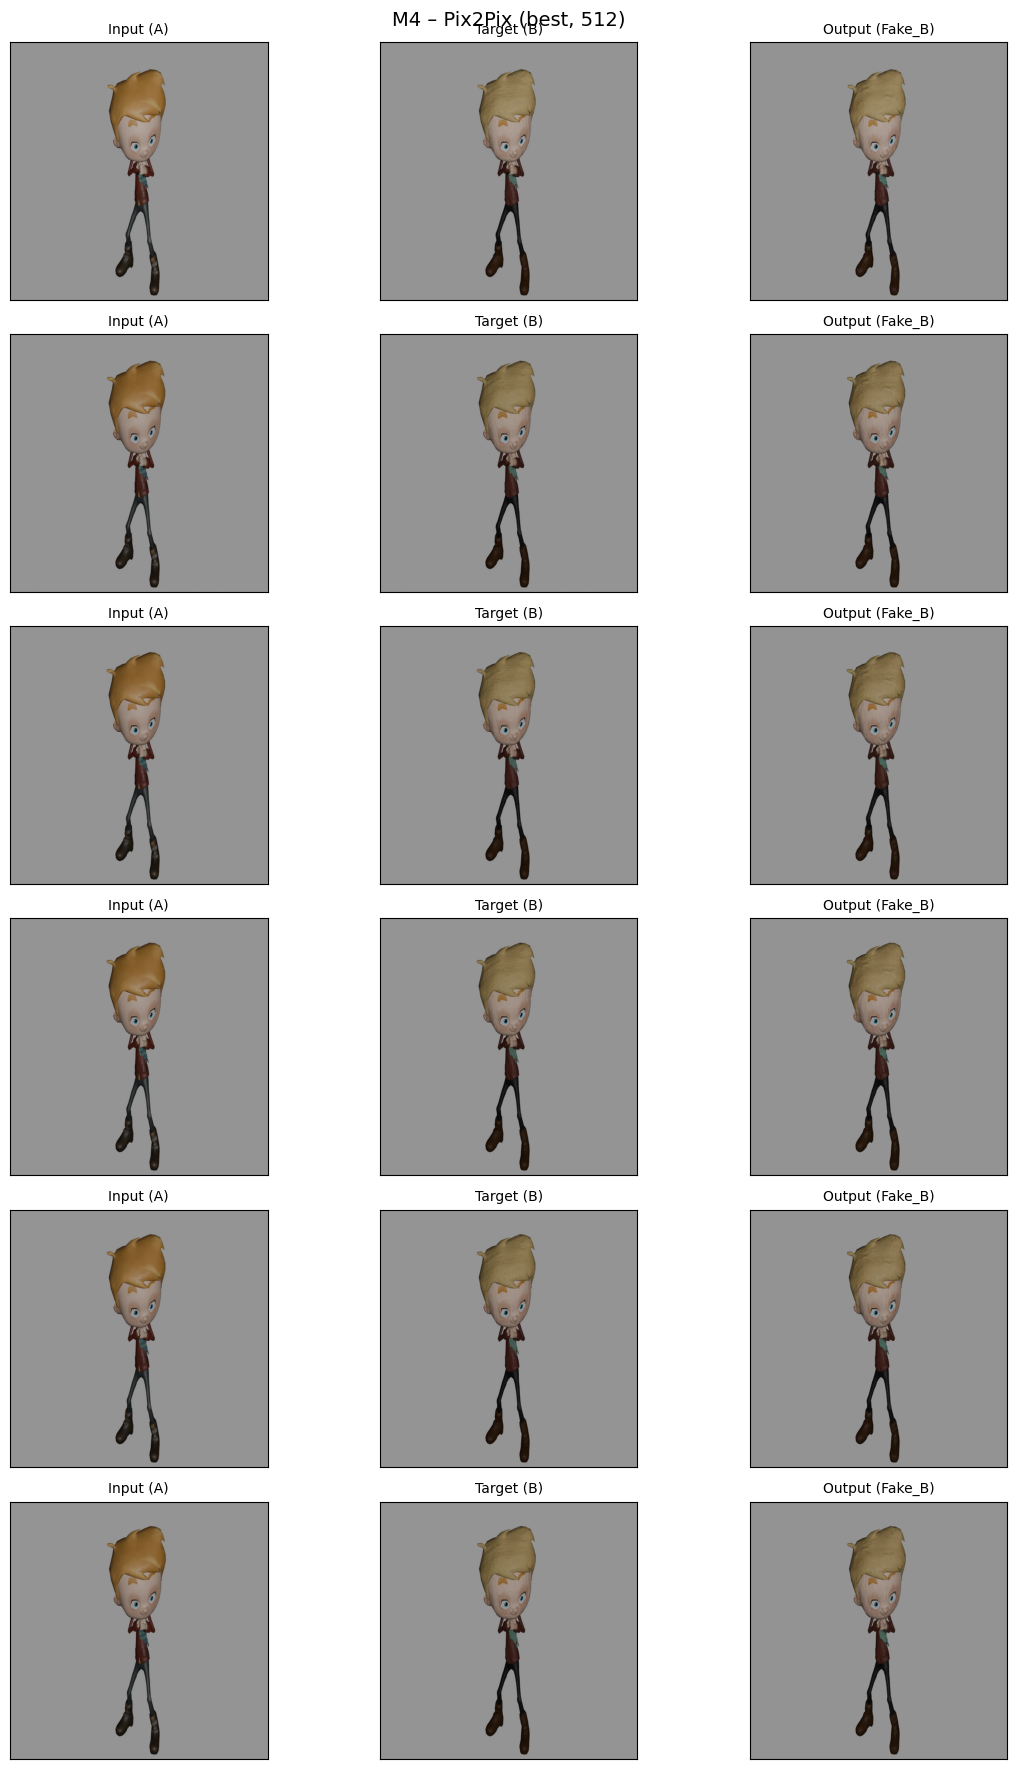


=== M3 – Pix2Pix (filtered B v2) ===
[pix2pix] in 'C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_512_e50_v2\test_45\images': found real_A=150, triplets=150, missing real_B for 0, missing fake_B for 0
  e.g.: Blender 4.20001_real_A.png | Blender 4.20001_real_B.png | Blender 4.20001_fake_B.png
[Saved] C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\thesis_figs\M3_–_Pix2Pix_(filtered_B_v2).png



=== M2 – Pix2Pix (filtered B v1) ===
[pix2pix] in 'C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_512_e50\test_50\images': found real_A=150, triplets=150, missing real_B for 0, missing fake_B for 0
  e.g.: Blender 4.20001_real_A.png | Blender 4.20001_real_B.png | Blender 4.20001_fake_B.png
[Saved] C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\thesis_figs\M2_–_Pix2Pix_(filtered_B_v1).png


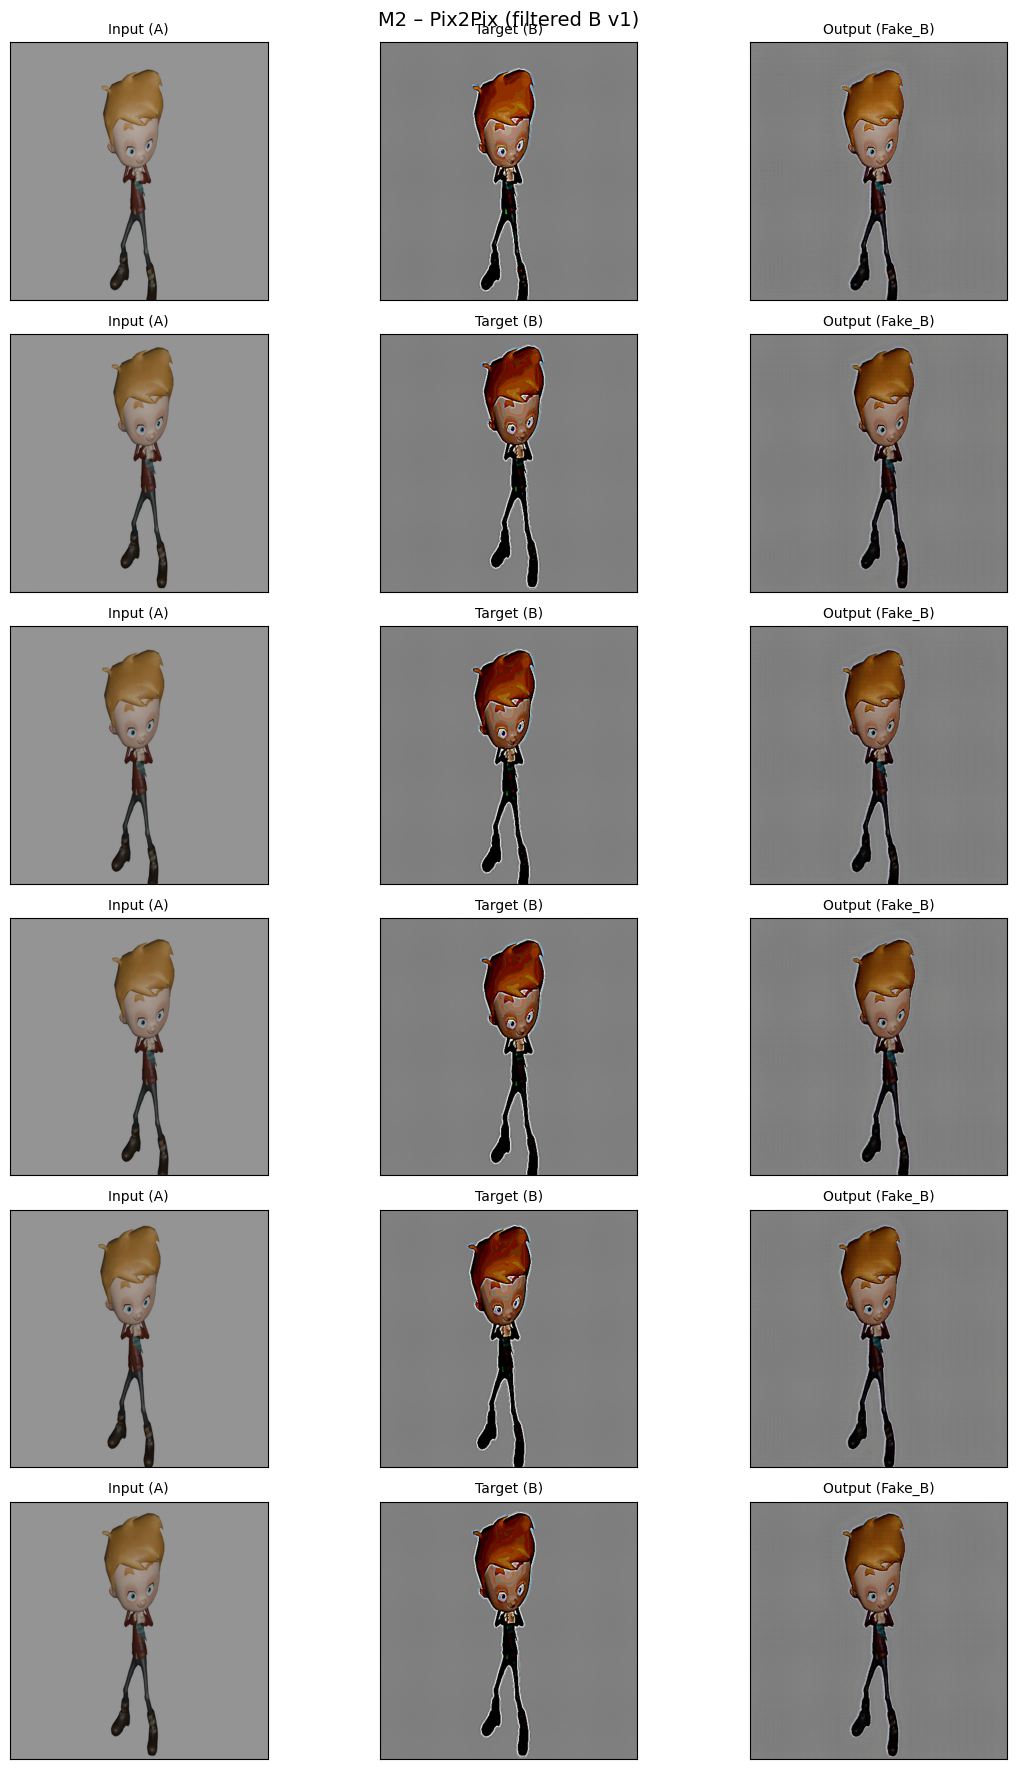


=== M1 – CycleGAN (unpaired) ===
[cyclegan] in 'C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\stopmotion_cyclegan\test_latest\images': real_A=55, with fake_B available=55
  e.g.: reaction_20001_real_A.png | reaction_20001_fake_B.png
[Saved] C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\thesis_figs\M1_–_CycleGAN_(unpaired).png


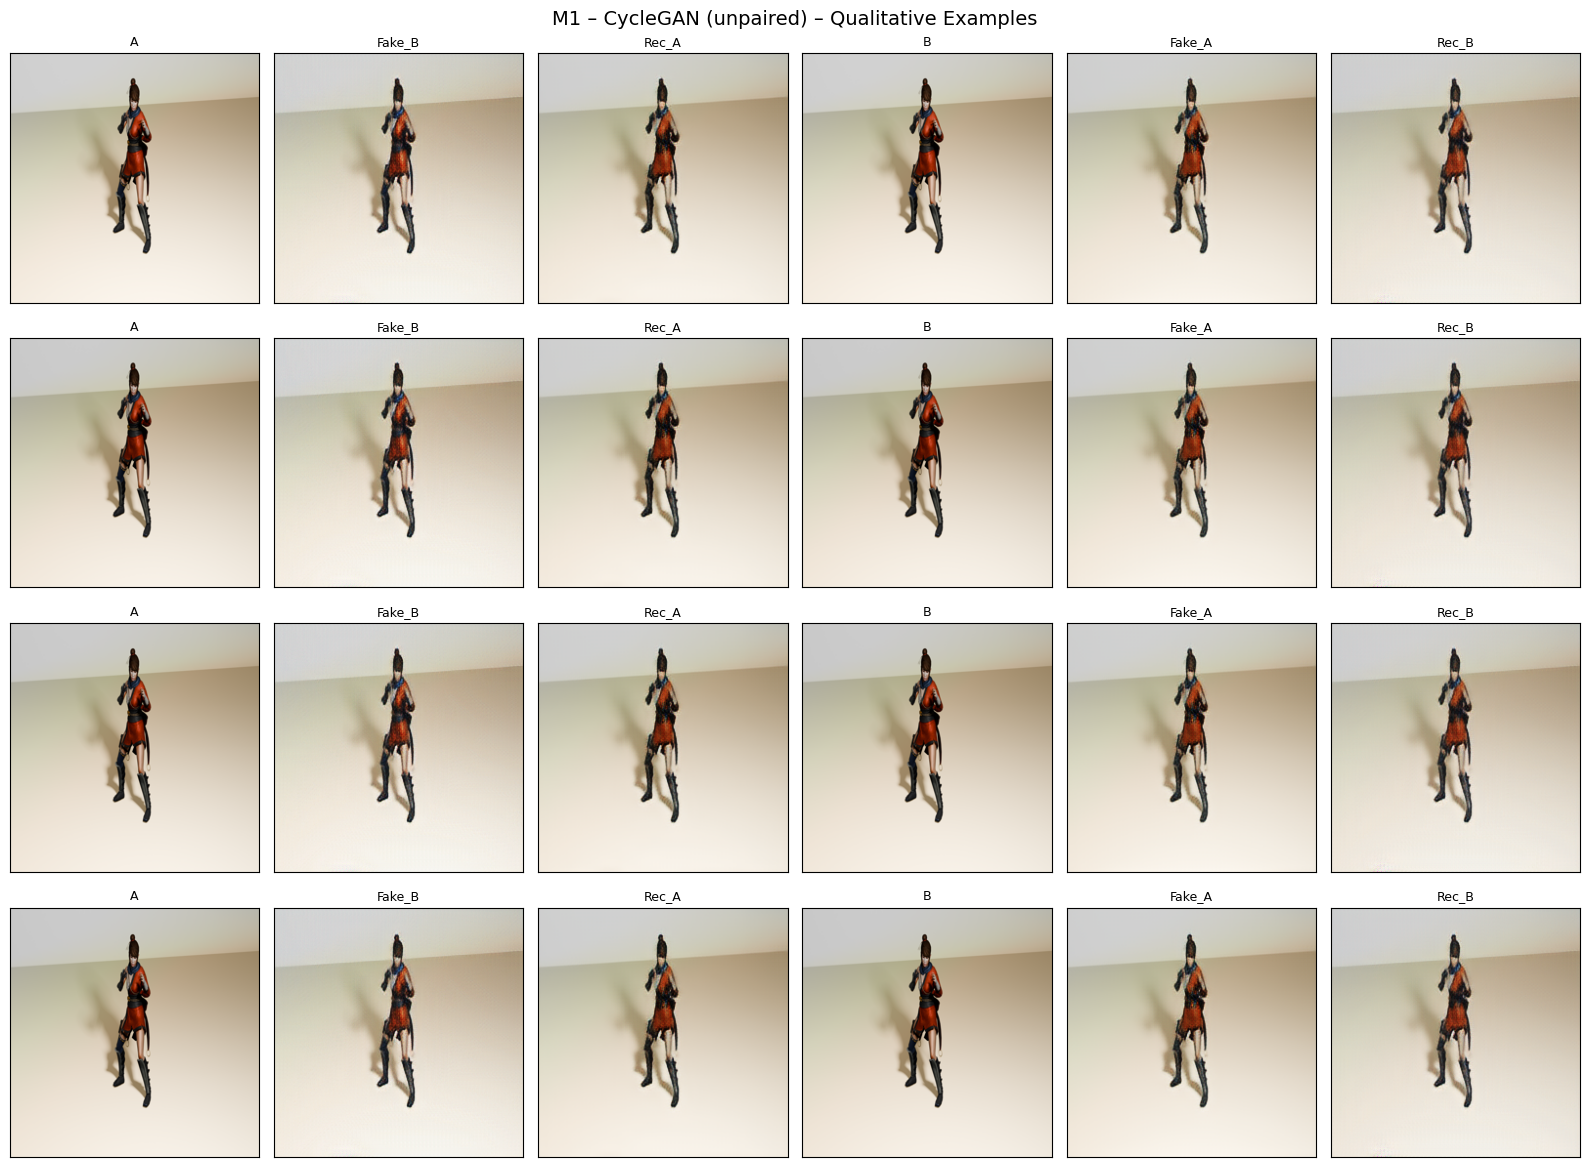


Done.


In [14]:
import os, glob
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# ========== CONFIG ==========
MODELS = [
    {
        "name": "M4 – Pix2Pix (best, 512)",
        "type": "pix2pix",
        "results_dir": r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_v3_512\test_latest\images",
        "samples": 6,
    },
    {
        "name": "M3 – Pix2Pix (filtered B v2)",
        "type": "pix2pix",
        "results_dir": r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_512_e50_v2\test_45\images",
        "samples": 6,
    },
    {
        "name": "M2 – Pix2Pix (filtered B v1)",
        "type": "pix2pix",
        "results_dir": r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_512_e50\test_50\images",
        "samples": 6,
    },
    {
        "name": "M1 – CycleGAN (unpaired)",
        "type": "cyclegan",
        "results_dir": r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\stopmotion_cyclegan\test_latest\images",
        "samples": 4,
    },
]

OUT_DIR = Path(r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\thesis_figs")
OUT_DIR.mkdir(parents=True, exist_ok=True)

def imread(path):
    return np.array(Image.open(path).convert("RGB"))

def _with_any_ext(folder, stem):
    """Return Path if a file with this stem exists with .png or .jpg (case-insensitive)."""
    for ext in (".png", ".jpg", ".jpeg", ".PNG", ".JPG", ".JPEG"):
        p = folder / f"{stem}{ext}"
        if p.exists():
            return p
    return None

def collect_pix2pix_triplets(img_dir):
    """Find *_real_A.*, and pair with *_real_B.* and *_fake_B.* (any ext)."""
    d = Path(img_dir)
    real_A_files = sorted(list(d.glob("*_real_A.*")))
    triplets = []
    missing_rb, missing_fb = 0, 0

    for ra in real_A_files:
        key = ra.name
        for tag in ["_real_A.png","_real_A.jpg","_real_A.jpeg",
                    "_real_A.PNG","_real_A.JPG","_real_A.JPEG"]:
            if key.endswith(tag):
                key = key[: -len(tag)]
                break

        rb = _with_any_ext(d, f"{key}_real_B")
        fb = _with_any_ext(d, f"{key}_fake_B")

        if rb is None:
            missing_rb += 1
        if fb is None:
            missing_fb += 1
        if rb and fb:
            triplets.append({"key": key, "real_A": ra, "real_B": rb, "fake_B": fb})

    print(f"[pix2pix] in '{img_dir}': found real_A={len(real_A_files)}, triplets={len(triplets)}, "
          f"missing real_B for {missing_rb}, missing fake_B for {missing_fb}")
    if triplets[:2]:
        print("  e.g.:", triplets[0]["real_A"].name, "|", triplets[0]["real_B"].name, "|", triplets[0]["fake_B"].name)
    return triplets

def collect_cyclegan_sets(img_dir):
    d = Path(img_dir)
    real_A_files = sorted(list(d.glob("*_real_A.*")))
    sets = []
    for ra in real_A_files:
        key = ra.name
        for tag in ["_real_A.png","_real_A.jpg","_real_A.jpeg",
                    "_real_A.PNG","_real_A.JPG","_real_A.JPEG"]:
            if key.endswith(tag):
                key = key[: -len(tag)]
                break

        entry = {
            "key": key,
            "real_A": ra,
            "fake_B": _with_any_ext(d, f"{key}_fake_B"),
            "rec_A":  _with_any_ext(d, f"{key}_rec_A"),
            "real_B": _with_any_ext(d, f"{key}_real_B"),
            "fake_A": _with_any_ext(d, f"{key}_fake_A"),
            "rec_B":  _with_any_ext(d, f"{key}_rec_B"),
        }
        sets.append(entry)

    have = sum(1 for s in sets if s["fake_B"] is not None)
    print(f"[cyclegan] in '{img_dir}': real_A={len(real_A_files)}, with fake_B available={have}")
    if sets[:1]:
        s = sets[0]
        print("  e.g.:", s["real_A"].name, "|", getattr(s["fake_B"], "name", "fake_B missing"))
    return sets

def plot_pix2pix_panel(name, triplets, n_rows=6, save_to=None):
    n_rows = min(n_rows, len(triplets))
    if n_rows == 0:
        print(f"[WARN] No pix2pix triplets to plot for {name}")
        return
    fig, axes = plt.subplots(n_rows, 3, figsize=(12, 3*n_rows))
    if n_rows == 1:
        axes = np.expand_dims(axes, 0)
    for i in range(n_rows):
        t = triplets[i]
        imgs = [imread(t["real_A"]), imread(t["real_B"]), imread(t["fake_B"])]
        titles = ["Input (A)", "Target (B)", "Output (Fake_B)"]
        for c in range(3):
            axes[i, c].imshow(imgs[c]); axes[i, c].set_xticks([]); axes[i, c].set_yticks([])
            axes[i, c].set_title(titles[c], fontsize=10)
    fig.suptitle(name, fontsize=14); fig.tight_layout()
    if save_to:
        fig.savefig(save_to, dpi=200, bbox_inches="tight"); print(f"[Saved] {save_to}")
    plt.show()

def plot_cyclegan_panel(name, sets, n_rows=4, save_to=None):
    valid = [s for s in sets if (s["real_A"] is not None and s["fake_B"] is not None)]
    n_rows = min(n_rows, len(valid))
    if n_rows == 0:
        print(f"[WARN] No CycleGAN examples with fake_B to plot for {name}")
        return
    fig, axes = plt.subplots(n_rows, 6, figsize=(16, 3*n_rows))
    if n_rows == 1:
        axes = np.expand_dims(axes, 0)
    for i in range(n_rows):
        s = valid[i]
        panels = [
            ("A", s["real_A"]),
            ("Fake_B", s["fake_B"]),
            ("Rec_A", s["rec_A"]),
            ("B", s["real_B"]),
            ("Fake_A", s["fake_A"]),
            ("Rec_B", s["rec_B"]),
        ]
        for c, (title, p) in enumerate(panels):
            ax = axes[i, c]
            if p is not None and Path(p).exists():
                ax.imshow(imread(p))
            else:
                ax.imshow(np.ones((64,64,3), dtype=np.uint8)*240); title += " (missing)"
            ax.set_xticks([]); ax.set_yticks([]); ax.set_title(title, fontsize=9)
    fig.suptitle(name + " – Qualitative Examples", fontsize=14)
    fig.tight_layout()
    if save_to:
        fig.savefig(save_to, dpi=200, bbox_inches="tight"); print(f"[Saved] {save_to}")
    plt.show()

for m in MODELS:
    print("\n===", m["name"], "===")
    img_dir = m["results_dir"]
    if not Path(img_dir).exists():
        print(f"[ERROR] results_dir does not exist: {img_dir}")
        continue
    out_path = OUT_DIR / (m["name"].replace(" ", "_").replace(":", "") + ".png")
    if m["type"].lower() == "pix2pix":
        trips = collect_pix2pix_triplets(img_dir)
        plot_pix2pix_panel(m["name"], trips, n_rows=m["samples"], save_to=out_path)
    else:
        sets = collect_cyclegan_sets(img_dir)
        plot_cyclegan_panel(m["name"], sets, n_rows=m["samples"], save_to=out_path)

print("\nDone.")


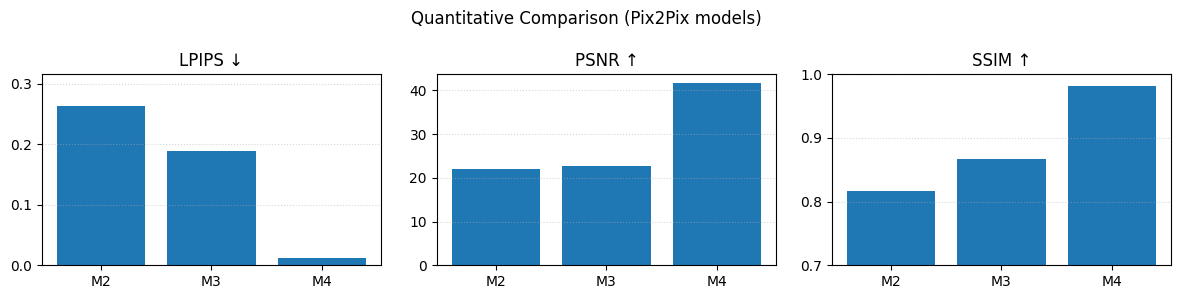

In [12]:
import matplotlib.pyplot as plt
import numpy as np

METRICS = {
    "M1 CycleGAN (A→B LPIPS)": 0.0379,  
    "M2 Pix2Pix": {"LPIPS": 0.2630, "PSNR": 22.02, "SSIM": 0.8162},
    "M3 Pix2Pix": {"LPIPS": 0.1881, "PSNR": 22.77, "SSIM": 0.8676},
    "M4 Pix2Pix": {"LPIPS": 0.0114, "PSNR": 41.56, "SSIM": 0.9824},
}

labels = ["M2", "M3", "M4"]
lpips = [METRICS["M2 Pix2Pix"]["LPIPS"], METRICS["M3 Pix2Pix"]["LPIPS"], METRICS["M4 Pix2Pix"]["LPIPS"]]
psnr  = [METRICS["M2 Pix2Pix"]["PSNR"],  METRICS["M3 Pix2Pix"]["PSNR"],  METRICS["M4 Pix2Pix"]["PSNR"]]
ssim  = [METRICS["M2 Pix2Pix"]["SSIM"],  METRICS["M3 Pix2Pix"]["SSIM"],  METRICS["M4 Pix2Pix"]["SSIM"]]

fig, axs = plt.subplots(1,3, figsize=(12,3))
axs[0].bar(labels, lpips); axs[0].set_title("LPIPS ↓"); axs[0].set_ylim(0, max(lpips)*1.2)
axs[1].bar(labels, psnr);  axs[1].set_title("PSNR ↑")
axs[2].bar(labels, ssim);  axs[2].set_title("SSIM ↑"); axs[2].set_ylim(0.7, 1.0)
for ax in axs: ax.grid(axis='y', linestyle=':', alpha=0.5)
plt.suptitle("Quantitative Comparison (Pix2Pix models)")
plt.tight_layout()
plt.show()


In [13]:
import matplotlib.pyplot as plt
import numpy as np

METRICS = {
    "M1 CycleGAN": {"LPIPS": 0.0379},
    "M2 Pix2Pix": {"LPIPS": 0.2630, "PSNR": 22.02, "SSIM": 0.8162},
    "M3 Pix2Pix": {"LPIPS": 0.1881, "PSNR": 22.77, "SSIM": 0.8676},
    "M4 Pix2Pix": {"LPIPS": 0.0114, "PSNR": 41.56, "SSIM": 0.9824},
}

labels_lpips = ["M1", "M2", "M3", "M4"]
lpips_vals   = [
    METRICS["M1 CycleGAN"]["LPIPS"],
    METRICS["M2 Pix2Pix"]["LPIPS"],
    METRICS["M3 Pix2Pix"]["LPIPS"],
    METRICS["M4 Pix2Pix"]["LPIPS"],
]

plt.figure(figsize=(6,4))
bars = plt.bar(labels_lpips, lpips_vals, color=["gray","C0","C1","C2"])
plt.title("LPIPS (Lower is better)")
plt.ylabel("Distance")
for bar, val in zip(bars, lpips_vals):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.005, f"{val:.3f}", 
             ha='center', va='bottom', fontsize=9)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.show()

labels = ["M2", "M3", "M4"]
psnr  = [METRICS["M2 Pix2Pix"]["PSNR"],  METRICS["M3 Pix2Pix"]["PSNR"],  METRICS["M4 Pix2Pix"]["PSNR"]]
ssim  = [METRICS["M2 Pix2Pix"]["SSIM"],  METRICS["M3 Pix2Pix"]["SSIM"],  METRICS["M4 Pix2Pix"]["SSIM"]]

fig, axs = plt.subplots(1,2, figsize=(10,3))

bars1 = axs[0].bar(labels, psnr, color=["C0","C1","C2"])
axs[0].set_title("PSNR ↑ (dB)")
for bar, val in zip(bars1, psnr):
    axs[0].text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.2, f"{val:.2f}", 
                ha='center', va='bottom', fontsize=9)

bars2 = axs[1].bar(labels, ssim, color=["C0","C1","C2"])
axs[1].set_title("SSIM ↑")
axs[1].set_ylim(0.7, 1.0)
for bar, val in zip(bars2, ssim):
    axs[1].text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.01, f"{val:.3f}", 
                ha='center', va='bottom', fontsize=9)

for ax in axs: ax.grid(axis='y', linestyle=':', alpha=0.5)
plt.suptitle("Quantitative Comparison – Pix2Pix models (M2–M4)")
plt.tight_layout()
plt.show()


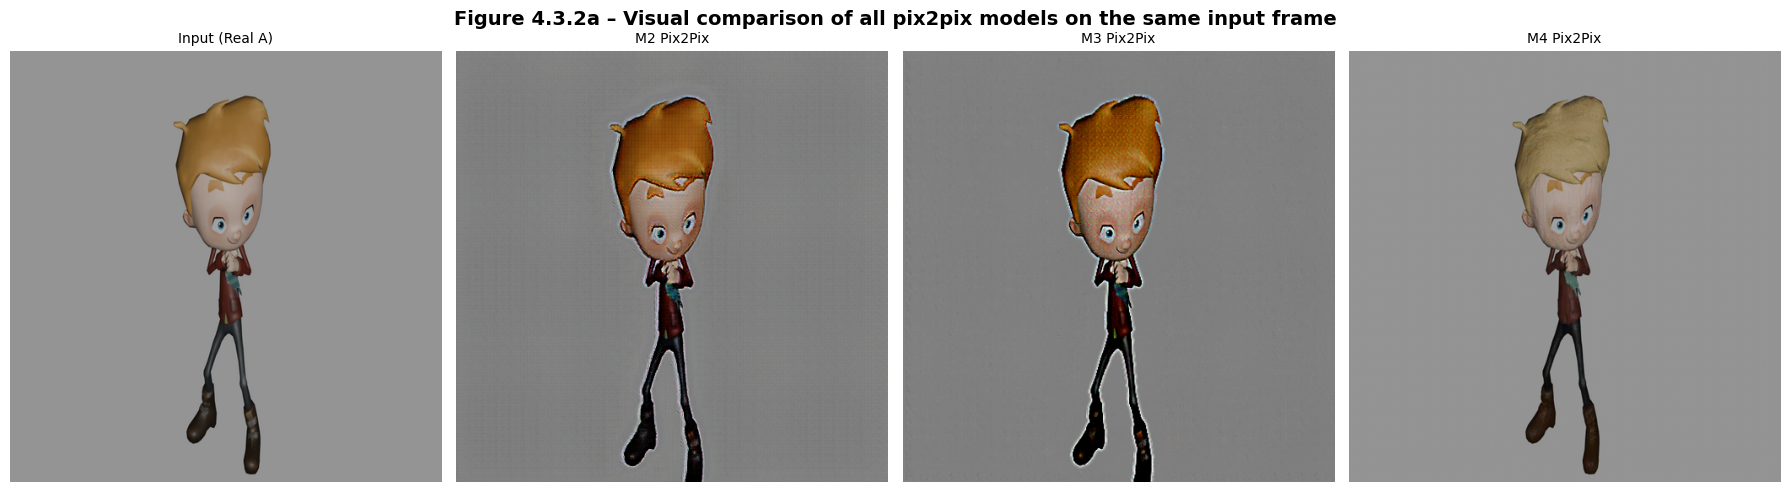

In [21]:
import os
import matplotlib.pyplot as plt
from PIL import Image

paths = {
    "Input (Real A)": r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_v3_512\test_latest\images\Blender 4.20001_real_A.png",
    "M2 Pix2Pix": r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_512_e50\test_50\images\Blender 4.20001_fake_B.png",
    "M3 Pix2Pix": r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_512_e50_v2\test_45\images\Blender 4.20001_fake_B.png",
    "M4 Pix2Pix": r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_v3_512\test_latest\images\Blender 4.20001_fake_B.png",
}

fig, axs = plt.subplots(1, len(paths), figsize=(18, 5))

for ax, (title, img_path) in zip(axs, paths.items()):
    if not os.path.exists(img_path):
        ax.text(0.5, 0.5, "Missing file", ha="center", va="center")
        ax.set_title(title + " (not found)", fontsize=10)
        ax.axis("off")
        continue
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(title, fontsize=10)
    ax.axis("off")

plt.suptitle("Figure 4.3.2a – Visual comparison of all pix2pix models on the same input frame", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


In [22]:
import os
import matplotlib.pyplot as plt
from PIL import Image

paths = {
    "Input (Real A)": r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_v3_512\test_latest\images\Blender 4.20001_real_A.png",
    "M2 Pix2Pix": r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_512_e50\test_50\images\Blender 4.20001_fake_B.png",
    "M3 Pix2Pix": r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_512_e50_v2\test_45\images\Blender 4.20001_fake_B.png",
    "M4 Pix2Pix": r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\results\coraline_p2p_v3_512\test_latest\images\Blender 4.20001_fake_B.png",
}

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for ax, (title, img_path) in zip(axs.ravel(), paths.items()):
    if not os.path.exists(img_path):
        ax.text(0.5, 0.5, "Missing file", ha="center", va="center")
        ax.set_title(title + " (not found)", fontsize=10)
        ax.axis("off")
        continue
    img = Image.open(img_path).resize((512, 512))
    ax.imshow(img)
    ax.set_title(title, fontsize=12)
    ax.axis("off")

plt.suptitle("Figure 4.3.2a – Visual comparison of all models on the same input frame", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()
